In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
pd.options.display.max_colwidth = 250
data = pd.read_csv('cleaned_AllPeople.csv', low_memory=False)
sessions = pd.read_csv('Cleaned_Events_With_SessionID.csv', low_memory=False)

In [3]:
sessions.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
num_sessions = sessions[['distinct_id', 'session_id']].groupby('distinct_id').agg('count').rename({'session_id' : 'num_sessions'}, axis=1)
num_sessions

,num_sessions
distinct_id,
00000000-0000-0000-0000-000000000000,2
000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,97
001210DC-54C8-43AD-B295-148F47818391,61
0019C3B9-FA62-4AB4-A895-1390A1FA818C,1
0025A8A4-2590-4ECA-8CE8-419D710AE46F,64
...,...
wandaandreu@gmail.com_5053,5
willwojt@gmail.com_6868,178
wolphramite@gmail.com_291,4


In [5]:
sessions

,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,...,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,session_id,time_delta
0,$ae_first_open,00000000-0000-0000-0000-000000000000,2020-02-13 15:52:50,-1.0,Mumbai,Maharashtra,IN,1,1,NaN,...,NaN,NaN,INTL,0,0,0,0,0,-1,0.0
1,$ae_first_open,00000000-0000-0000-0000-000000000000,2020-03-08 20:43:54,-1.0,Ahmedabad,Gujarat,IN,1,1,NaN,...,NaN,NaN,INTL,0,0,0,0,0,-1,0.0
2,AppOpen,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:48:32,-1.0,Palo Alto,California,US,1,0,NaN,...,1 days 03:08:34.000000000,82.272727,US,1,0,0,0,1,1,0.0
3,Visit Signup/Login Page,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:48:35,-1.0,Palo Alto,California,US,1,0,NaN,...,1 days 03:08:34.000000000,82.272727,US,1,0,0,0,1,1,0.0
4,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:49:02,30.1,Palo Alto,California,US,1,0,NaN,...,1 days 03:08:34.000000000,82.272727,US,1,0,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190366,Feed - Scroll Down,xbarbarazhong@gmail.com_6704,2019-12-12 14:29:23,-1.0,Portland,Oregon,US,1,0,NaN,...,NaN,NaN,US,1,1,0,0,0,29813,3.0
190367,Profile - Change Section,xbarbarazhong@gmail.com_6704,2019-12-12 14:29:28,-1.0,Portland,Oregon,US,1,0,NaN,...,NaN,NaN,US,1,1,0,0,0,29813,3.0
190368,$ae_session,xbarbarazhong@gmail.com_6704,2019-12-12 14:30:54,190.4,Portland,Oregon,US,1,1,NaN,...,NaN,NaN,US,1,1,0,0,0,29813,3.0
190369,AppOpen,yoon.s.jeong@gmail.com_6485,2019-10-09 11:12:29,-1.0,Chicago,Illinois,US,1,1,NaN,...,NaN,NaN,US,1,0,0,1,0,29814,0.0


In [6]:
data = data.merge(num_sessions, how='left', left_on='distinct_id', right_index=True)

In [7]:
#data = data.merge(metrics, how='left', left_on='distinct_id', right_on='distinct_id')
data['commentAdded'].value_counts()

2    185185
0      3708
1      1478
Name: commentAdded, dtype: int64

In [8]:
data['commentLength'].value_counts()

0.0      188893
8.0         102
6.0          53
4.0          40
5.0          39
          ...  
327.0         1
258.0         1
245.0         1
240.0         1
254.0         1
Name: commentLength, Length: 333, dtype: int64

# Aggregating outside columns

In [9]:
aggregated_columns = data.copy()[['distinct_id','commentLength', 'commentAdded']]
commentAdded = aggregated_columns['commentAdded']

commentFix = []
for i in commentAdded:
    if i == 2:
        commentFix.append(0)
    elif i == 1:
        commentFix.append(1)
    else:
        commentFix.append(0)
commentFix = np.array(commentFix)
aggregated_columns['commentAdded'] = commentFix

In [10]:
sum_columns = aggregated_columns.copy()[['distinct_id', 'commentAdded']]
mean_columns = aggregated_columns.copy()[['distinct_id','commentLength']]

In [11]:
comment_Added_DF = sum_columns.groupby('distinct_id').agg(sum)
comment_Length_DF = mean_columns.groupby('distinct_id').agg(np.mean)

In [12]:
def replace_first(row):
    try:
        if (pd.isnull(row["ae_first_app_open_date"])):
            return row["time"]
        else:
            return row["ae_first_app_open_date"]
    except:
        return 0
    
def replace_last_seen(row):
    try:
        if (row["last_time"] > row["last_seen"]):
            return row["last_time"]
        elif (pd.isnull(row["last_seen"])): 
            return row["last_time"]
        else:
            return row["last_seen"]
    except:
        return 0
    
def last_time_add(row):
    di = row["distinct_id"]
    return keep_last[keep_last["distinct_id"] == di ].iloc[0]["time"]

In [13]:
pd.set_option('display.max_columns', None)

sorted_data = data.copy()
sorted_data["last_seen"] = pd.to_datetime(sorted_data['last_seen'], utc = True)
sorted_data["time"] = pd.to_datetime(sorted_data['time'], utc = True)
sorted_data["ae_first_app_open_date"] = pd.to_datetime(sorted_data["ae_first_app_open_date"], utc = True)
sorted_data = sorted_data.sort_values("time", ascending = True)
keep_last = sorted_data.copy()

sorted_data = sorted_data.drop_duplicates(subset = "distinct_id", keep = "first")
keep_last = keep_last.drop_duplicates(subset = "distinct_id", keep = "last")

sorted_data["last_time"] = sorted_data.apply(last_time_add, axis = 1)
sorted_data["last_seen"] = sorted_data.apply(replace_last_seen, axis = 1)
sorted_data["ae_first_app_open_date"] = sorted_data.apply(replace_first, axis = 1)

date_data = sorted_data.copy()
average_total_app_sessions = np.mean(date_data["ae_total_app_sessions"])
date_data['ae_total_app_sessions'] = date_data['ae_total_app_sessions'].fillna(average_total_app_sessions)
date_data['active_timespan'] = date_data["last_seen"] - date_data["ae_first_app_open_date"]
date_data['active_timespan'] = [elem.total_seconds() for elem in date_data['active_timespan']]
date_data['active_timespan'] = date_data['active_timespan'] / (60 * 60 * 24)

date_data['sessions_per_day'] = date_data['num_sessions'] / 180
date_data["sessions_per_day"].replace({np.inf: 0}, inplace=True)
date_data = date_data.sort_values("distinct_id", ascending = True)

In [14]:
filled_data = date_data.copy()
# filled_data = filled_data[["distinct_id", "active_timespan", "ae_total_app_sessions", "sessions_per_day"]]

In [15]:
list(filled_data.columns)

['name_x',
 'distinct_id',
 'time',
 'ae_session_length',
 'city',
 'region',
 'mp_country_code',
 'locationSetting',
 'notificationSettings',
 'FirstTimeUploaded',
 'Signup With',
 'imageAdded',
 'commentAdded',
 'commentLength',
 'ImageUploaded',
 'ae_total_app_session_length',
 'name_y',
 'ae_total_app_sessions',
 'timezone',
 'last_seen',
 'ios_app_version',
 'ios_version',
 'ios_device_model',
 'ios_lib_version',
 'ae_first_app_open_date',
 'active_timespan',
 'average_session_time',
 'country',
 'US',
 'Unknown',
 'Facebook',
 'Foodie',
 'Google',
 'num_sessions',
 'last_time',
 'sessions_per_day']

# Selecting the columns we want

In [16]:
selected_filled = filled_data.copy()[['distinct_id', 'locationSetting', 'notificationSettings', 'timezone', 'active_timespan', 'average_session_time', 'US', 'Facebook', 'Foodie', 'Google', 'Unknown', 'num_sessions', 'sessions_per_day']]
selected_filled['timezone'].value_counts()

America/New_York               1970
America/Los_Angeles             917
America/Chicago                 867
Asia/Kolkata                    783
America/Denver                   41
                               ... 
Asia/Makassar                     1
America/Kentucky/Louisville       1
Europe/Tirane                     1
Europe/Vilnius                    1
America/St_Thomas                 1
Name: timezone, Length: 79, dtype: int64

## One-Hot Encoding Timezone

In [17]:
old_Timezone = selected_filled.copy()['timezone']
NY = []
LA = []
Ch = []
Kol = []
De = []
other_timezone = []

for index in old_Timezone:
    if index == 'America/New_York':
        NY.append(1)
        LA.append(0)
        Ch.append(0)
        Kol.append(0)
        De.append(0)
        other_timezone.append(0)
    elif index == 'America/Los_Angeles':
        NY.append(0)
        LA.append(1)
        Ch.append(0)
        Kol.append(0)
        De.append(0)
        other_timezone.append(0)
    elif index == 'America/Chicago':
        NY.append(0)
        LA.append(0)
        Ch.append(1)
        Kol.append(0)
        De.append(0)
        other_timezone.append(0)
    elif index == 'Asia/Kolkata':
        NY.append(0)
        LA.append(0)
        Ch.append(0)
        Kol.append(1)
        De.append(0)
        other_timezone.append(0)
    elif index == 'America/Denver':
        NY.append(0)
        LA.append(0)
        Ch.append(0)
        Kol.append(0)
        De.append(1)
        other_timezone.append(0)
    else:
        NY.append(0)
        LA.append(0)
        Ch.append(0)
        Kol.append(0)
        De.append(0)
        other_timezone.append(1)
        
NY = np.array(NY)
LA = np.array(LA)
Ch = np.array(Ch)
Kol = np.array(Kol)
De = np.array(De)
other_timezone = np.array(other_timezone)

In [18]:
selected_filled = selected_filled.drop('timezone', axis=1)
selected_filled['America/New_York'] = NY
selected_filled['America/Los_Angeles'] = LA
selected_filled['America/Chicago'] = Ch
selected_filled['Asia/Kolkata'] = Kol
selected_filled['America/Denver'] = De
selected_filled['other_timezone'] = other_timezone

In [19]:
label_Ready = selected_filled.merge(comment_Added_DF, how='left', left_on='distinct_id', right_index=True)
label_Ready = label_Ready.merge(comment_Length_DF, how='left', left_on='distinct_id', right_index=True)
label_Ready

,distinct_id,locationSetting,notificationSettings,active_timespan,average_session_time,US,Facebook,Foodie,Google,Unknown,num_sessions,sessions_per_day,America/New_York,America/Los_Angeles,America/Chicago,Asia/Kolkata,America/Denver,other_timezone,commentAdded,commentLength
83729,00000000-0000-0000-0000-000000000000,1,0,24.202130,NaN,0,0,1,0,0,2,0.011111,0,0,0,0,0,1,0,0.000000
84492,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1,1,1.130949,82.272727,1,0,0,1,1,97,0.538889,0,1,0,0,0,0,0,0.000000
55831,001210DC-54C8-43AD-B295-148F47818391,1,0,7.158310,47.600000,1,0,0,1,1,61,0.338889,0,0,1,0,0,0,0,0.000000
102081,0019C3B9-FA62-4AB4-A895-1390A1FA818C,1,1,0.000000,NaN,1,0,1,0,0,1,0.005556,0,0,0,0,0,1,0,0.000000
33171,0025A8A4-2590-4ECA-8CE8-419D710AE46F,1,0,113.687361,176.750000,1,0,1,0,1,64,0.355556,1,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70158,wandaandreu@gmail.com_5053,1,0,188.791597,NaN,1,0,1,0,1,5,0.027778,1,0,0,0,0,0,0,0.000000
87817,willwojt@gmail.com_6868,1,0,37.992164,NaN,1,0,1,0,1,178,0.988889,1,0,0,0,0,0,5,2.252809
92278,wolphramite@gmail.com_291,1,0,79.125498,NaN,1,0,1,0,1,4,0.022222,1,0,0,0,0,0,0,0.000000
101276,xbarbarazhong@gmail.com_6704,1,0,0.584016,NaN,1,0,1,0,1,21,0.116667,0,1,0,0,0,0,0,0.000000


# Churn Label

In [20]:
def labeling(row):
    if (row["active_timespan"] > 0 and row["active_timespan"] < 150 and row["sessions_per_day"] < 0.14):
        return 1
    else:
        return 0

In [21]:
labeled_data = label_Ready.copy()
labeled_data["churned"] = labeled_data.apply(labeling, axis = 1)

In [22]:
labeled_data

,distinct_id,locationSetting,notificationSettings,active_timespan,average_session_time,US,Facebook,Foodie,Google,Unknown,num_sessions,sessions_per_day,America/New_York,America/Los_Angeles,America/Chicago,Asia/Kolkata,America/Denver,other_timezone,commentAdded,commentLength,churned
83729,00000000-0000-0000-0000-000000000000,1,0,24.202130,NaN,0,0,1,0,0,2,0.011111,0,0,0,0,0,1,0,0.000000,1
84492,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1,1,1.130949,82.272727,1,0,0,1,1,97,0.538889,0,1,0,0,0,0,0,0.000000,0
55831,001210DC-54C8-43AD-B295-148F47818391,1,0,7.158310,47.600000,1,0,0,1,1,61,0.338889,0,0,1,0,0,0,0,0.000000,0
102081,0019C3B9-FA62-4AB4-A895-1390A1FA818C,1,1,0.000000,NaN,1,0,1,0,0,1,0.005556,0,0,0,0,0,1,0,0.000000,0
33171,0025A8A4-2590-4ECA-8CE8-419D710AE46F,1,0,113.687361,176.750000,1,0,1,0,1,64,0.355556,1,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70158,wandaandreu@gmail.com_5053,1,0,188.791597,NaN,1,0,1,0,1,5,0.027778,1,0,0,0,0,0,0,0.000000,0
87817,willwojt@gmail.com_6868,1,0,37.992164,NaN,1,0,1,0,1,178,0.988889,1,0,0,0,0,0,5,2.252809,0
92278,wolphramite@gmail.com_291,1,0,79.125498,NaN,1,0,1,0,1,4,0.022222,1,0,0,0,0,0,0,0.000000,1
101276,xbarbarazhong@gmail.com_6704,1,0,0.584016,NaN,1,0,1,0,1,21,0.116667,0,1,0,0,0,0,0,0.000000,1


# Generating the labeled dataset `labeled_data.csv` 

In [23]:
labeled_data.to_csv('labeled_data.csv')

## Plot of Timespan vs. Sessions Per Day for All Users

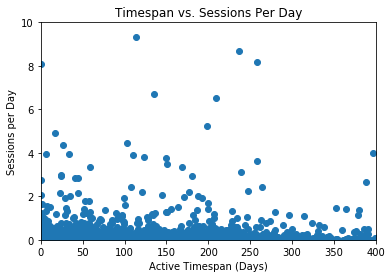

In [24]:
plt.xlabel('Active Timespan (Days)')
plt.ylabel('Sessions per Day')
plt.ylim((0, 10))
plt.xlim((0, 400))
plt.title('Timespan vs. Sessions Per Day')
plt.scatter(labeled_data['active_timespan'], labeled_data['sessions_per_day'])